1. Descriptive analysis + data visualization (exploratory data analysis),
2. Classification along with detailed accuracy assessment,

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
#sns.set_palette("magma")
plt.rcParams["figure.figsize"] = (25, 6)

# Introduction

This report focuses on Telco customer churn, which contains information about a fictional telco company that provided home phone and Internet services to customers in California. Aiming to discover what defining variables customers have that make them decide to part with their services. By delving into this analysis, we aim to uncover invaluable insights that can significantly impact a Telco's business strategy. The analysis will isolate elements to retain customers, adjust services to better meet customer needs, and potentially forecast and prevent churn before it occurs.

## Describing data

Let's load our data:

In [74]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [50]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [39]:
print(list(data.columns))
print(data.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
(7043, 21)


The Telco customer churn data set contains 20 predictors worth of information on 7043 customers,
along with a target variable, churn, indicating whether the customer has given up (left the company) or not.

The variables are as follows:

<center>


**Table 1: Customer Churn Dataset** 

| Feature          | Description                                           | Type                  |
|------------------|-------------------------------------------------------|-----------------------|
| customerID       | Customer ID, a unique identifier                       | Categorical           |
| gender           | Whether the customer is male or female                 | Categorical           |
| SeniorCitizen    | Whether the customer is a senior citizen (1 or 0)      | Dichotomous categorical |
| Partner          | Whether the customer has a partner (Yes or No)         | Categorical           |
| Dependents       | Whether the customer has dependents (Yes or No)        | Categorical           |
| tenure           | Number of months the customer has stayed               | Integer-valued         |
| PhoneService     | Whether the customer has phone service (Yes or No)      | Categorical           |
| MultipleLines    | Whether the customer has multiple lines                | Categorical           |
| InternetService  | Customer’s internet service provider                   | Categorical           |
| OnlineSecurity   | Whether the customer has online security               | Categorical           |
| OnlineBackup     | Whether the customer has online backup                 | Categorical           |
| DeviceProtection | Whether the customer has device protection             | Categorical           |
| TechSupport      | Whether the customer has tech support                  | Categorical           |
| StreamingTV      | Whether the customer has streaming TV                  | Categorical           |
| StreamingMovies  | Whether the customer has streaming movies              | Categorical           |
| Contract         | The contract term of the customer                      | Categorical           |
| PaperlessBilling | Whether the customer has paperless billing             | Categorical           |
| PaymentMethod    | The customer’s payment method                          | Categorical           |
| MonthlyCharges   | The amount charged to the customer monthly             | Continuous            |
| TotalCharges     | The total amount charged to the customer               | Continuous            |
| Churn            | Whether the customer churned (Yes or No)               | Categorical           |

</center>

 The Table 1 encompasses a range of categorical and numerical data crucial for analyzing customer churn patterns.

Moving forward in our analysis, we can proceed to remove the 'customerID' variable as it serves as an identification number and holds no relevance for further analysis.

In [75]:
data = data.drop(columns="customerID")

Next, we'll proceed to inspect the dataset for any missing values and verify if the variable types have been correctly assigned. This step involves checking for the presence of any null or missing data points and ensuring that the data types assigned to each variable align accurately with their respective formats.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Subsequently, we've identified that the 'TotalCharges' variable is currently of an incorrect data type and should be interpreted as a floating-point number. Our next step involves converting the 'TotalCharges' column into the appropriate data type of floating-point numbers.

In [79]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

Let's double-check for any missing data once again.

In [80]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Due to the change in the data type of the 'Total Charges' column, missing values have emerged.

In [54]:
data[data["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Additionally, these instances exhibit a tenure of 0, despite having non-null MonthlyCharges. This data seemed contradictory, prompting us to opt for their removal from the dataset.

In [77]:
data.dropna(inplace=True)

In [76]:
Dup = data.duplicated()
Dup[Dup==True]

964     True
1338    True
1491    True
1739    True
1932    True
2713    True
2892    True
3301    True
3754    True
4098    True
4476    True
5506    True
5736    True
5759    True
6267    True
6499    True
6518    True
6609    True
6706    True
6764    True
6774    True
6924    True
dtype: bool

Let's now check the integrity of our data.

In [27]:
no_phone_service_from_multiplelines = data.MultipleLines[
    data.MultipleLines == "No phone service"
].index.to_list()


no_phone_Service = data.PhoneService[data.PhoneService == "No"].index.to_list()


no_phone_Service == no_phone_service_from_multiplelines

True

We ensured consistency with the 'No Internet Service' category between the 'Online Security' and 'Internet Service' columns.

In [28]:
data.OnlineSecurity[
    data.OnlineSecurity == "No internet service"
].index.to_list() == data.OnlineSecurity[data.InternetService == "No"].index.to_list()

True

We checked whether all users marked as "No phone service" in the 'MultipleLines' column also hold the 'No' value in the 'Phone Service' column. We found no discrepancies; therefore, the data is consistent in this aspect.

In [29]:
data[data.OnlineSecurity == "No internet service"].index.to_list() == data[
    data.OnlineBackup == "No internet service"
].index.to_list() == data[
    data.DeviceProtection == "No internet service"
].index.to_list() == data[
    data.TechSupport == "No internet service"
].index.to_list() == data[
    data.StreamingTV == "No internet service"
].index.to_list() == data[
    data.StreamingMovies == "No internet service"
].index.to_list()

True

We've verified that there are 1526 observations across the columns 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', and 'Streaming Movies' that correspond to the category 'No internet connection,' aligning with the 'No' category in 'Internet Service.'

Next, we'll proceed to examine the diversity within the data.

In [12]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

The dataset comprises a mix of variables with varying cardinalities. Categorical features such as 'gender,' 'SeniorCitizen,' and 'Partner' have a low cardinality, indicating a limited number of distinct values. On the other hand, services like 'MultipleLines,' 'InternetService,' and 'PaymentMethod' display a moderate cardinality, offering a few more distinct categories. Notably, 'tenure,' 'MonthlyCharges,' and 'TotalCharges' exhibit high cardinality, implying a wide range of unique values, which could pose challenges in modeling or analysis due to their diversity.

# Preliminary analysis of variables

In our analysis, we will categorize our examination into continuous and categorical variables, starting with an initial focus on the categorical ones. This approach allows us to comprehensively understand the categorical attributes before delving into the examination of continuous variables.

<center>

**Table 2: Feature Distribution in Dataset**

| Feature            | Categories              | Count |
|--------------------|-------------------------|------:|
| Gender             | Male                    |  3555 |
|                    | Female                  |  3488 |
| Senior Citizen     | 0                       |  5901 |
|                    | 1                       |  1142 |
| Partner            | Yes                     |  3402 |
|                    | No                      |  3641 |
| Dependents         | Yes                     |  2110 |
|                    | No                      |  4933 |
| Phone Service      | Yes                     |  6361 |
|                    | No                      |   682 |
| Multiple Lines     | Yes                     |  2971 |
|                    | No                      |  3390 |
|                    | No phone service        |   682 |
| Internet Service   | Fiber optic             |  3096 |
|                    | DSL                     |  2421 |
|                    | No                      |  1526 |
| Online Security    | Yes                     |  2019 |
|                    | No                      |  3498 |
|                    | No internet service     |  1526 |
| Online Backup      | Yes                     |  2429 |
|                    | No                      |  3088 |
|                    | No internet service     |  1526 |
| Device Protection  | Yes                     |  2422 |
|                    | No                      |  3095 |
|                    | No internet service     |  1526 |
| Tech Support       | Yes                     |  2044 |
|                    | No                      |  3473 |
|                    | No internet service     |  1526 |
| Streaming TV       | Yes                     |  2707 |
|                    | No                      |  2810 |
|                    | No internet service     |  1526 |
| Streaming Movies   | Yes                     |  2732 |
|                    | No                      |  2785 |
|                    | No internet service     |  1526 |
| Contract           | Month-to-month          |  3875 |
|                    | Two year                |  1695 |
|                    | One year                |  1473 |
| PaperlessBilling   | Yes                     |  4171 |
|                    | No                      |  2872 |
| Payment Method     | Electronic check        |  2365 |
|                    | Mailed check            |  1612 |
|                    | Bank transfer (automatic)|  1544 |
|                    | Credit card (automatic) |  1522 |
| Churn              | Yes                     |  1869 |
|                    | No                      |  5174 |

</center>


#TODO: WNIOSKI Z TABELI

In [58]:
data[['Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 
      'PaperlessBilling', 'Churn']] = data[['Partner', 'Dependents', 
                                            'PhoneService', 'MultipleLines', 
                                            'PaperlessBilling', 'Churn']].replace({'Yes': 1, 'No': 0}, inplace=False)

Based on the data in Table 2, we can conclude that there is a significant disparity in the data set in the "Senior Citizen" category. The data consists mainly of non-seniors, who are almost 6 times more numerous than seniors. When it comes to dependents, the "No" category significantly outnumbers the "Yes" category, with a ratio of 2:1. In addition, it was observed that more than 90% of users have telephone service, which means a significant disproportion in this category as we

In [59]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    fig = plt.figure(figsize=(28, 15))
    fig.suptitle(super_title, fontsize=22, y=0.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, 2, index)
        prop_by_independent = pd.crosstab(data[column], data["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )
        prop_by_independent.plot(kind="bar", ax=ax, stacked=True, rot=0, fontsize=16)
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        ax.set_title(
            "Proportion of observations by " + column, fontsize=20, loc="center"
        )
        ax.tick_params(rotation="auto")
        plt.tight_layout()

In [60]:
def percentage_stacked_plot2(columns_to_plot, super_title, shape=(2, 2)):
    nrows, ncols = shape
    fig = plt.figure(figsize=(28, 15))
    fig.suptitle(super_title, fontsize=22, y=0.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(nrows, ncols, index)
        prop_by_independent = pd.crosstab(data[column], data["Churn"]).apply(
            lambda x: x / x.sum() * 100, axis=1
        )
        prop_by_independent.plot(kind="bar", ax=ax, stacked=True, rot=0, fontsize=16)
        ax.legend(
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )

        ax.set_title(
            "Proportion of observations by " + column, fontsize=20, loc="center"
        )
        ax.tick_params(rotation="auto")
        plt.tight_layout()

We are now focusing on studying and understanding the demographic information present in the dataset. 

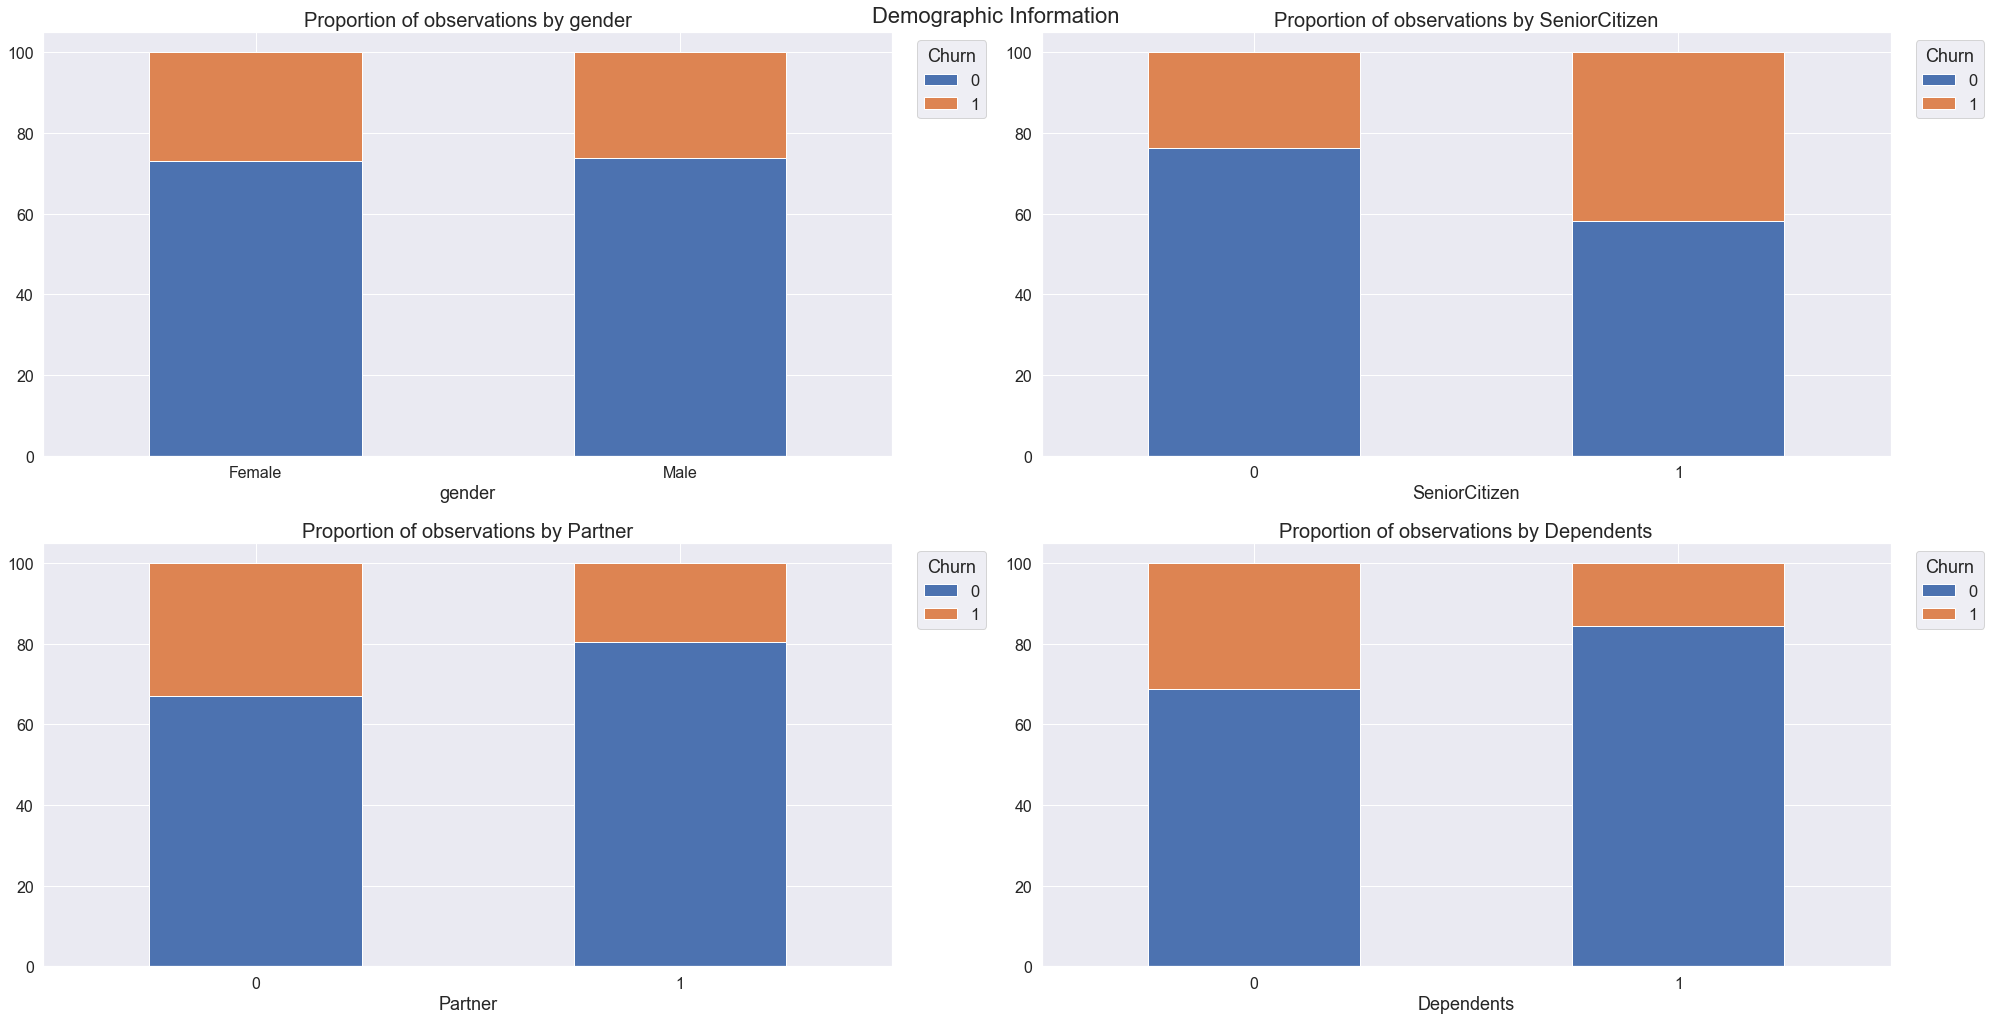

In [61]:
demographic_columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]
percentage_stacked_plot(demographic_columns, "Demographic Information")

An examination of demographic attributes reveals noteworthy insights regarding customer churn in the dataset studied. Seniors show almost twice the churn rate of younger people, highlighting the significant influence of age on churn behavior. Gender analysis suggests that it has minimal predictive power with regard to churn rates. Both male and female customers show remarkably similar churn rates, indicating that gender is a less influential factor in determining customer churn. Customers with a partner show significantly lower churn rates compared to those without partners, suggesting a potential correlation between partnership status and customer retention.

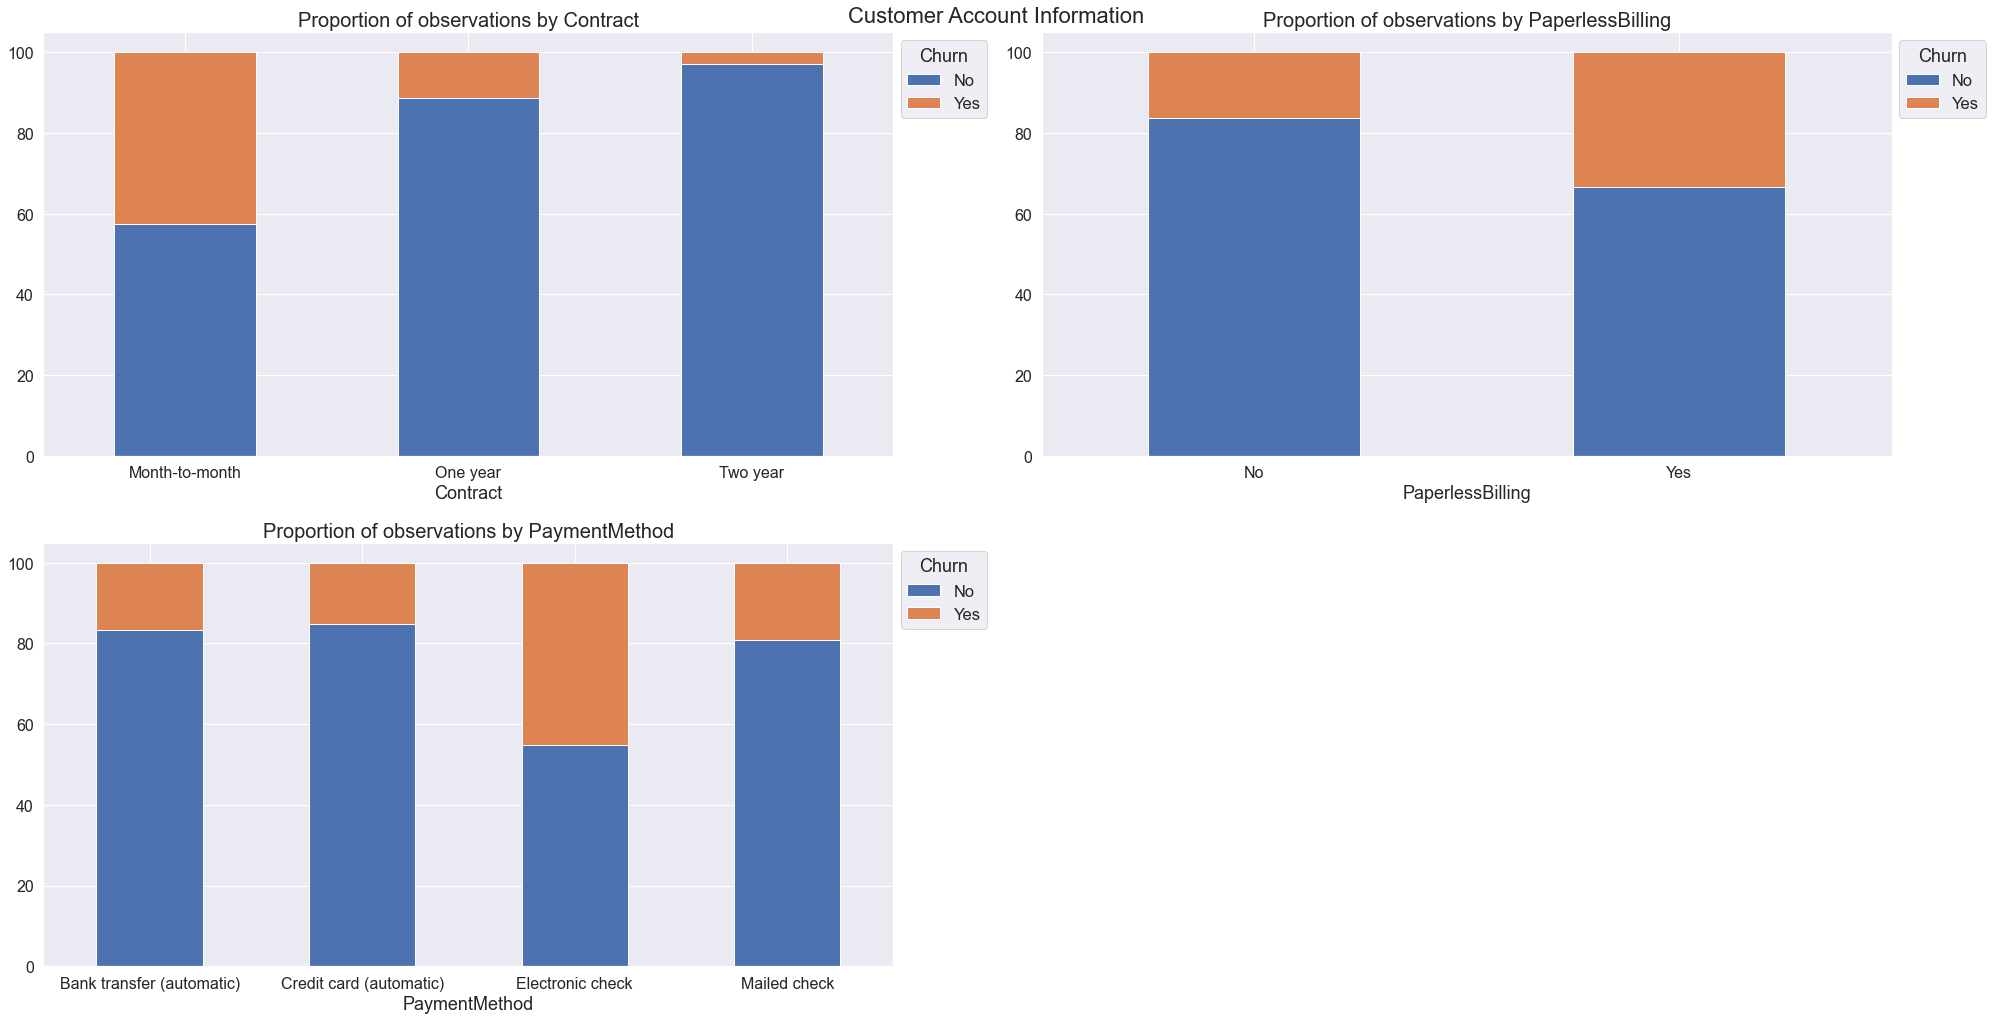

In [71]:
account_columns = ["Contract", "PaperlessBilling", "PaymentMethod"]
percentage_stacked_plot(account_columns, "Customer Account Information")

Contract type proves to be a key determinant of churn. Monthly contracts show a significantly higher churn rate of 42.71%, while long-term contracts, such as one-year and two-year contracts, show much lower churn rates of 11.28% and 2.85%, respectively. This discrepancy suggests that longer contractual commitments foster greater customer loyalty, leading to lower churn rates.

Billing preferences also play a significant role in churn. Customers using paperless billing show higher churn rates compared to those preferring traditional billing methods.

A study of payment methods also highlights their impact on churn rates. Customers using electronic check payments show significantly higher churn rates compared to alternatives.


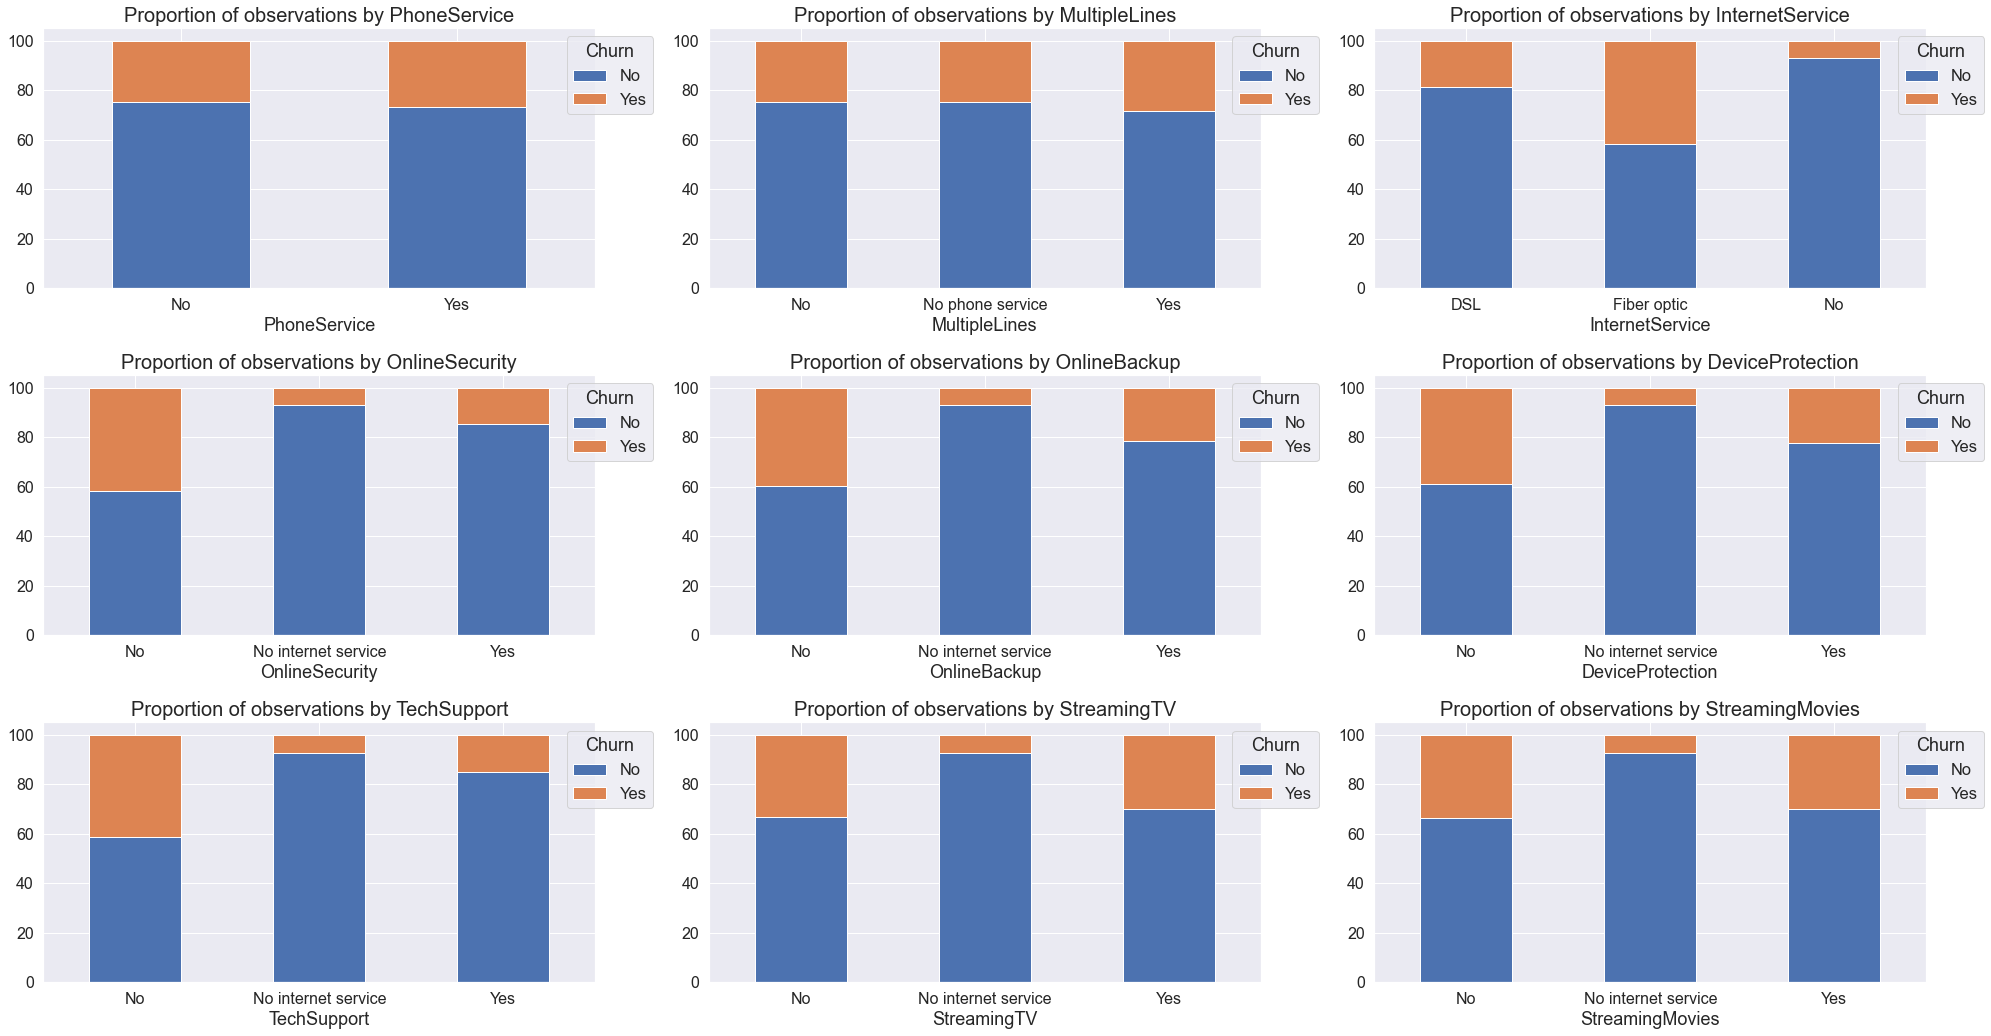

In [94]:
service_columnms = ['PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
percentage_stacked_plot2(service_columnms, "", shape=(3, 3))

In [84]:
def histograms(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 5))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.histplot(dataset[data], ax=axs[i], fill=True, alpha=1, linewidth=0)
        axs[i].set_title(data)

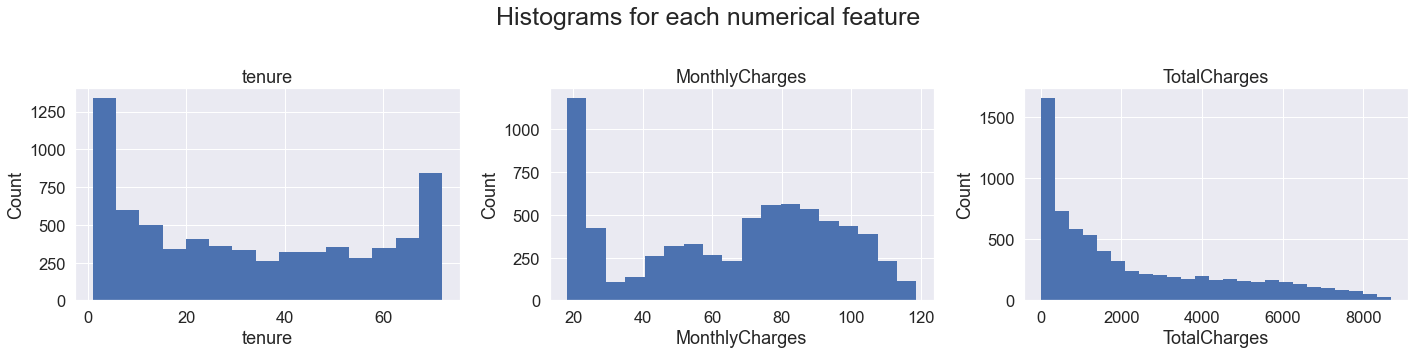

In [85]:
histograms(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Histograms for each numerical feature",
)
plt.tight_layout()

In [66]:
def dist_numerical(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 5))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=1, linewidth=0)
        axs[i].set_title(
            data
            + ", skewness is "
            + str(round(dataset[data].skew(axis=0, skipna=True), 2))
        )

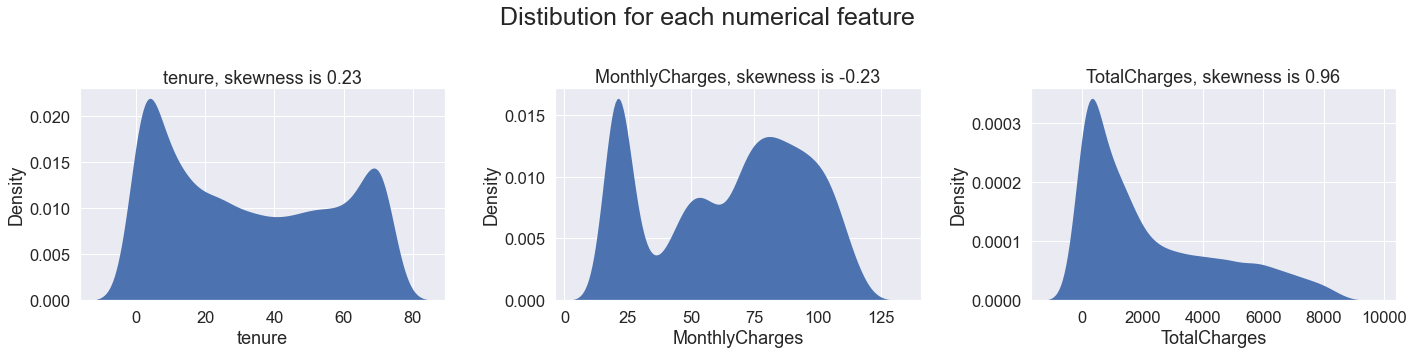

In [87]:
dist_numerical(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Distibution for each numerical feature",
)
plt.tight_layout()

In [78]:
from sklearn import preprocessing

data[['tenure', 'MonthlyCharges', 'TotalCharges']] = preprocessing.normalize(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

ValueError: could not convert string to float: ''

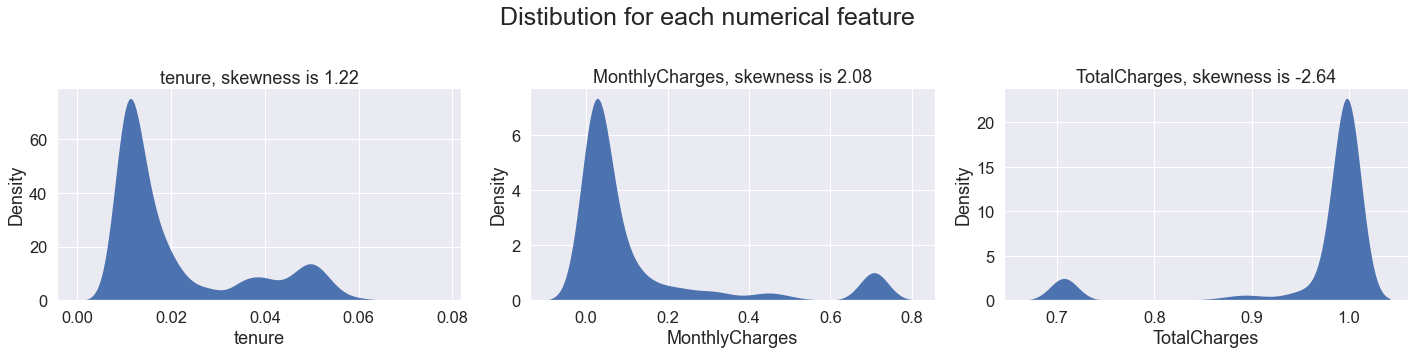

In [67]:
dist_numerical(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Distibution for each numerical feature",
)
plt.tight_layout()

In [81]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = preprocessing.scale(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

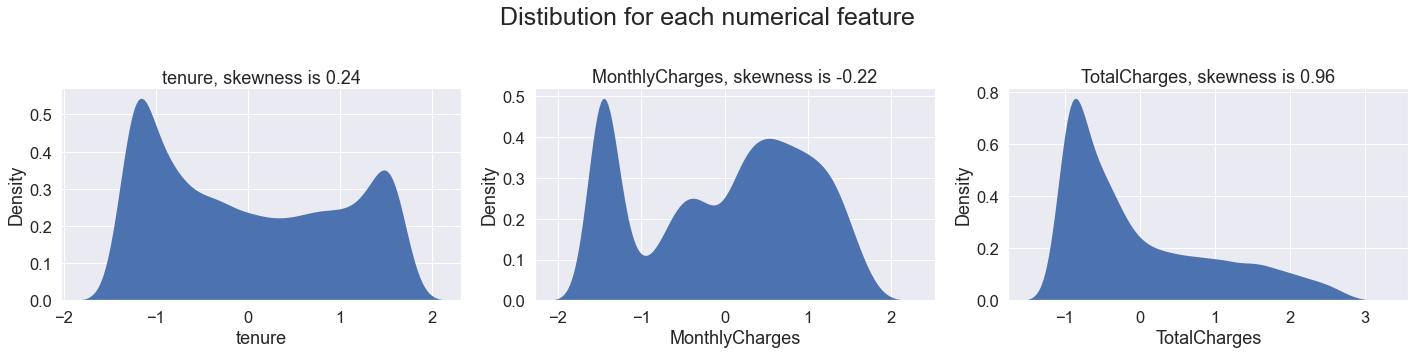

In [82]:
dist_numerical(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Distibution for each numerical feature",
)
plt.tight_layout()

In [88]:
def boxplots(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 5))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient="h", ax=axs[i])
        axs[i].set_title(data)

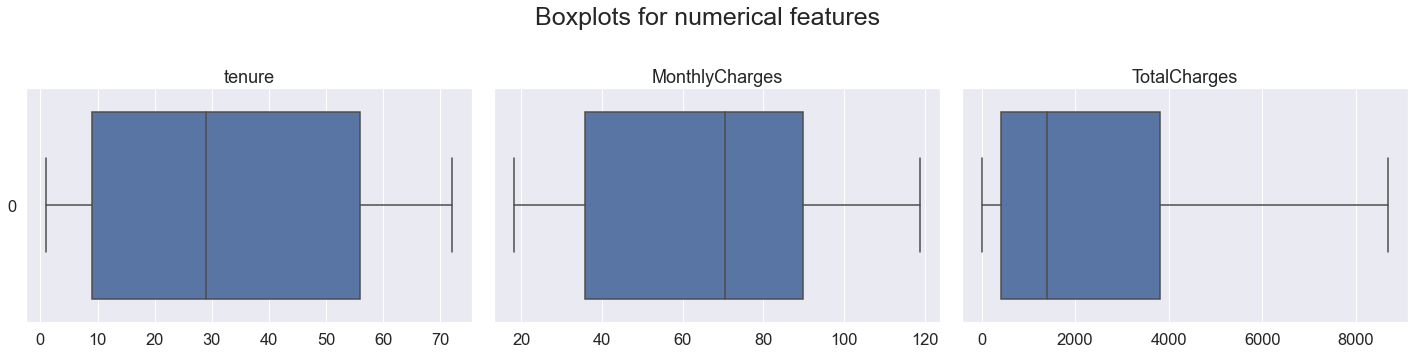

In [89]:
boxplots(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Boxplots for numerical features",
)
plt.tight_layout()

The distribution of variables in the dataset follows a non-normal pattern. When observing the tenure and MonthlyCharges variables, they exhibit a peculiar bimodal distribution, suggesting the presence of two distinct peaks or modes within their data distribution. Additionally, the TotalCharges variable displays a right-skewed distribution, indicating that the majority of data points are concentrated towards the lower end of the range, with a tail extending towards higher values.

In [35]:
def dist_churn(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(25, 5))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(
            dataset[data][dataset["Churn"] == "No"],
            ax=axs[i],
            fill=True,
            alpha=0.5,
            linewidth=0,
        )
        sns.kdeplot(
            dataset[data][dataset["Churn"] == "Yes"],
            ax=axs[i],
            fill=True,
            alpha=0.5,
            linewidth=0,
        )
        axs[i].legend(
            ["No", "Yes"],
            loc="upper right",
            bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
            title="Churn",
            fancybox=True,
        )
        axs[i].set_title(f"Distribution of {data} by churn")
        axs[i].set_ylabel("Density")
        axs[i].set_xlabel(data)

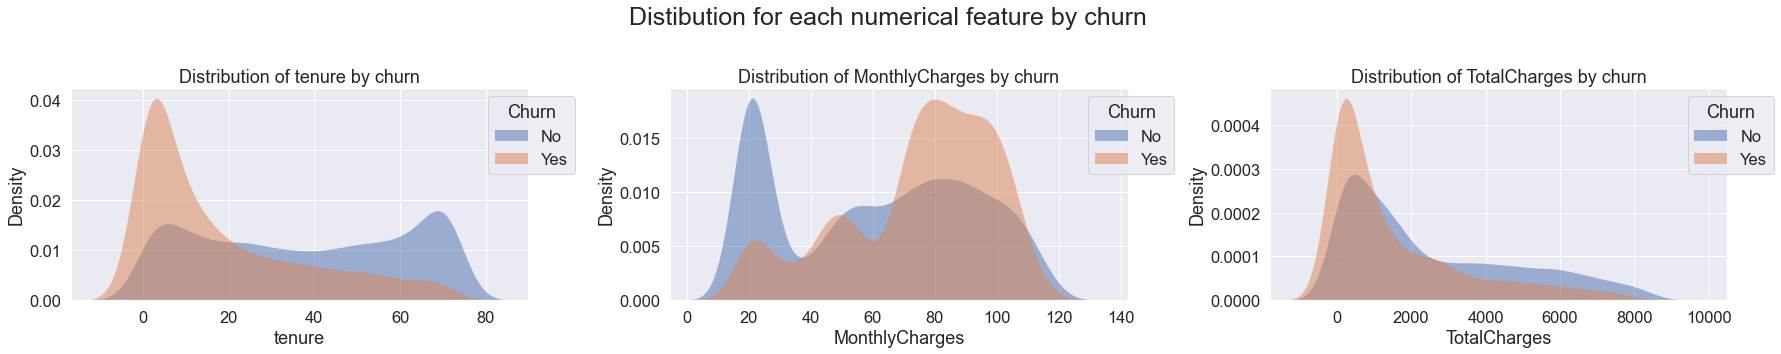

In [36]:
dist_churn(
    dataset=data,
    columns_list=["tenure", "MonthlyCharges", "TotalCharges"],
    rows=1,
    cols=3,
    suptitle="Distibution for each numerical feature by churn",
)
plt.tight_layout()

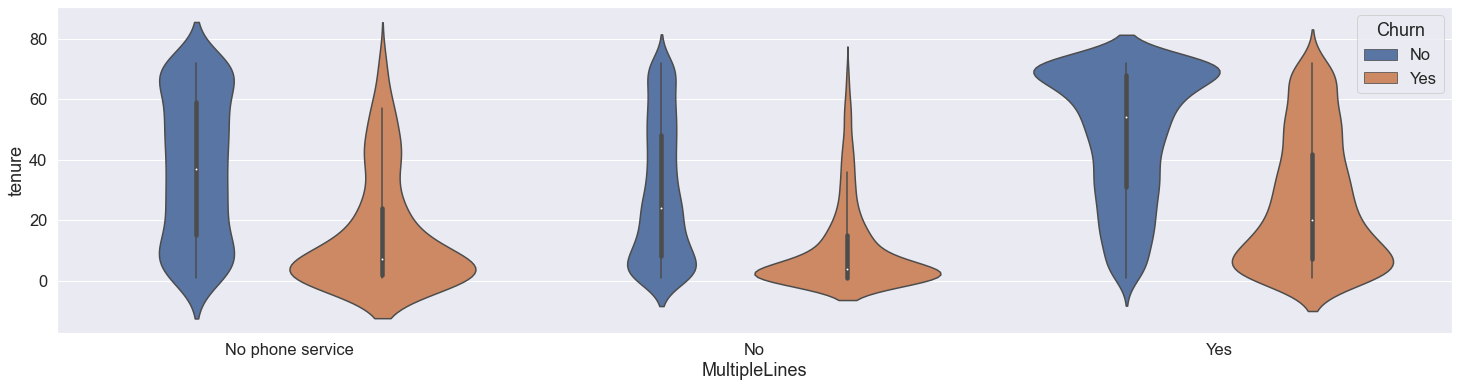

In [56]:
sns.violinplot(data=data, x='MultipleLines', y='tenure', hue='Churn')
plt.show()

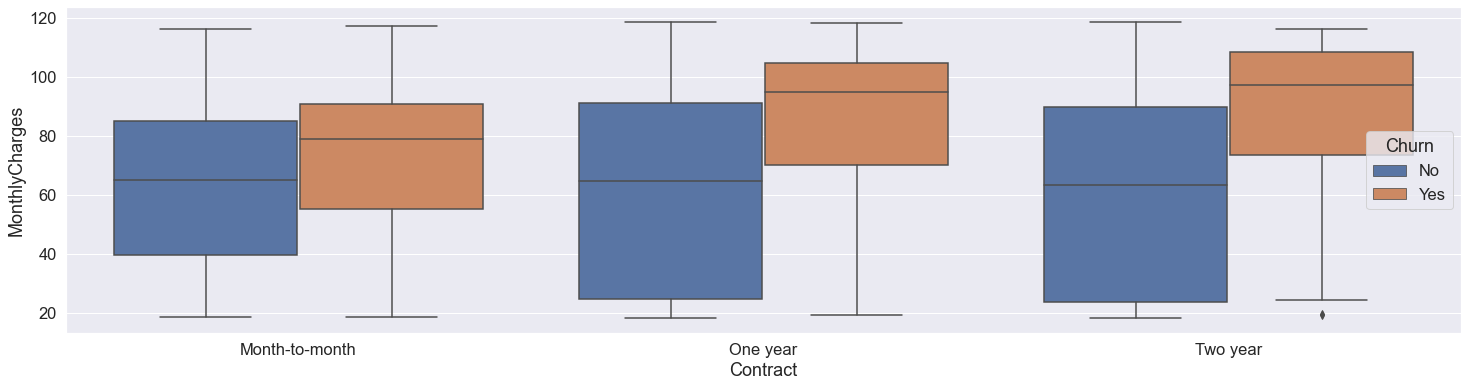

In [72]:
sns.boxplot(data=data, x='Contract', y='MonthlyCharges', hue='Churn')
plt.show()

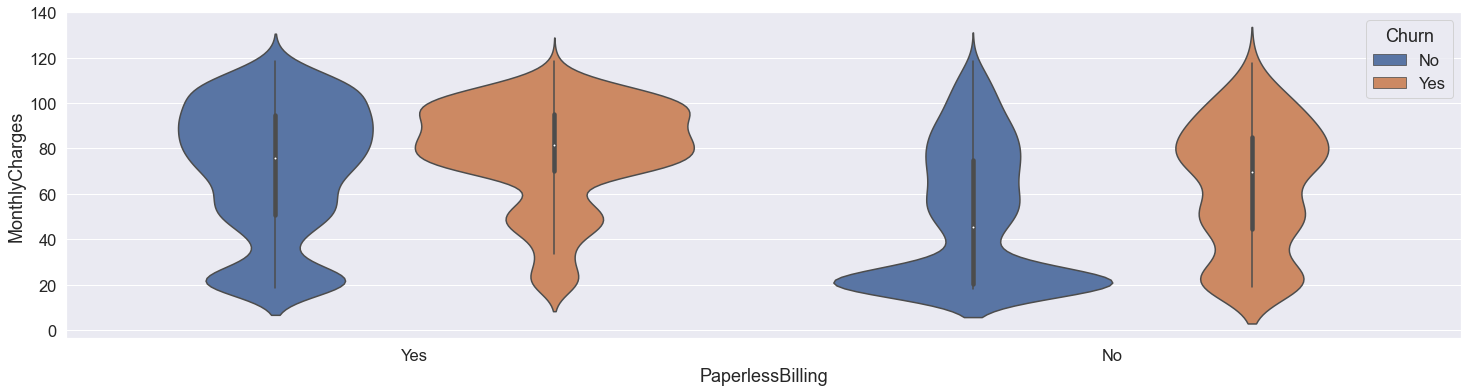

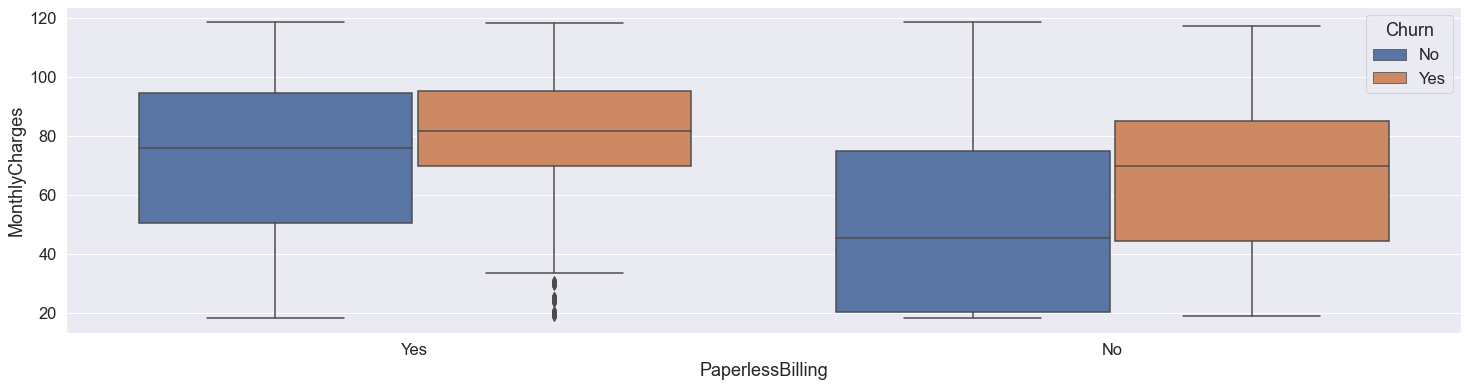

In [83]:
sns.violinplot(data=data, x='PaperlessBilling', y='MonthlyCharges', hue='Churn')
plt.show()
sns.boxplot(data=data, x='PaperlessBilling', y='MonthlyCharges', hue='Churn')
plt.show()


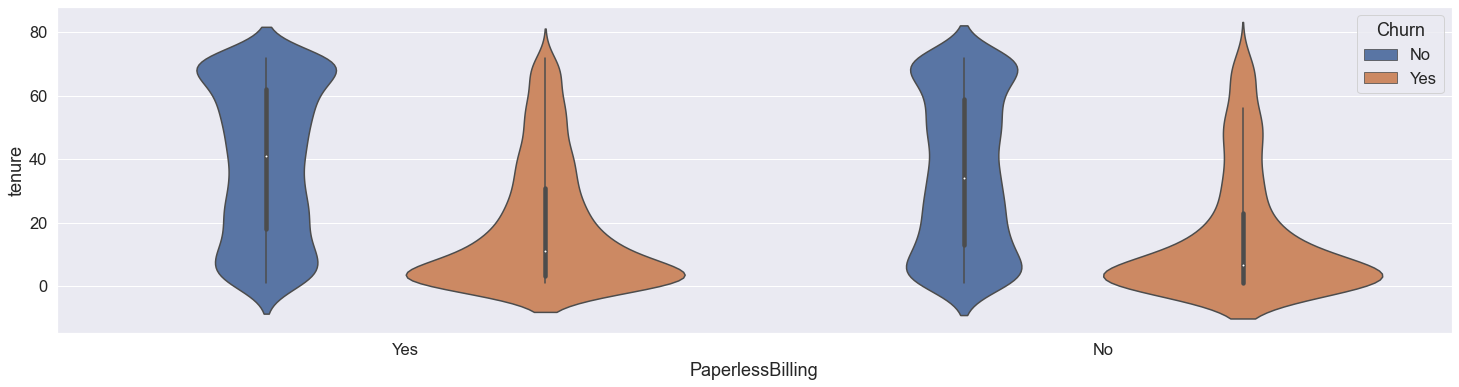

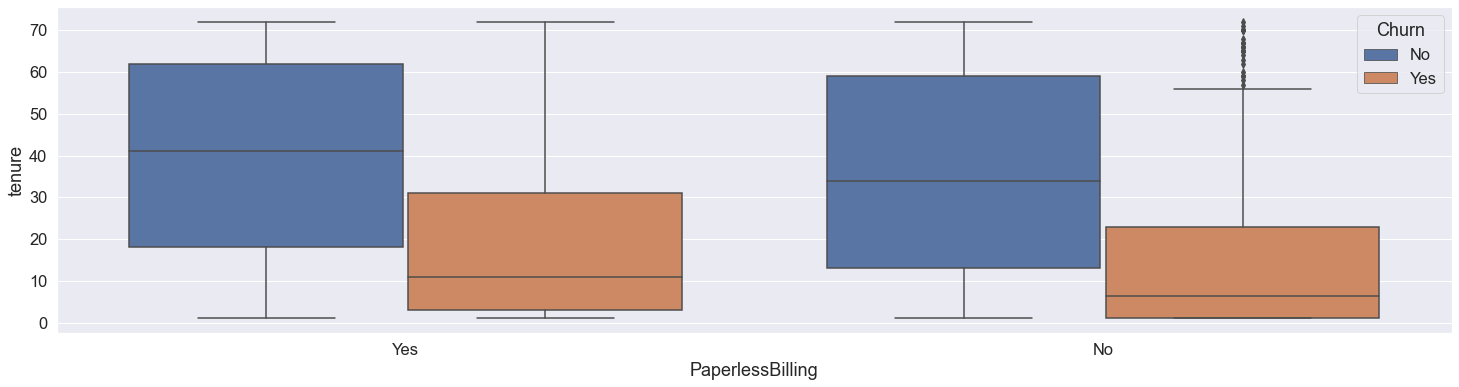

In [82]:
sns.violinplot(data=data, x='PaperlessBilling', y='tenure', hue='Churn')
plt.show()
sns.boxplot(data=data, x='PaperlessBilling', y='tenure', hue='Churn')
plt.show()


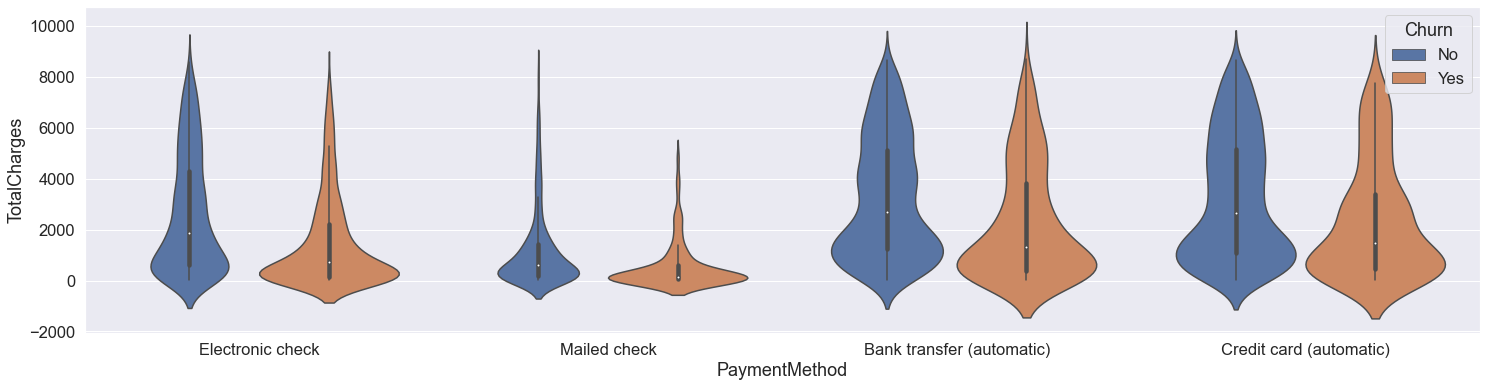

In [77]:
sns.violinplot(data=data, x='PaymentMethod', y='TotalCharges', hue='Churn')
plt.show()
# Wykresy bardzo podobne

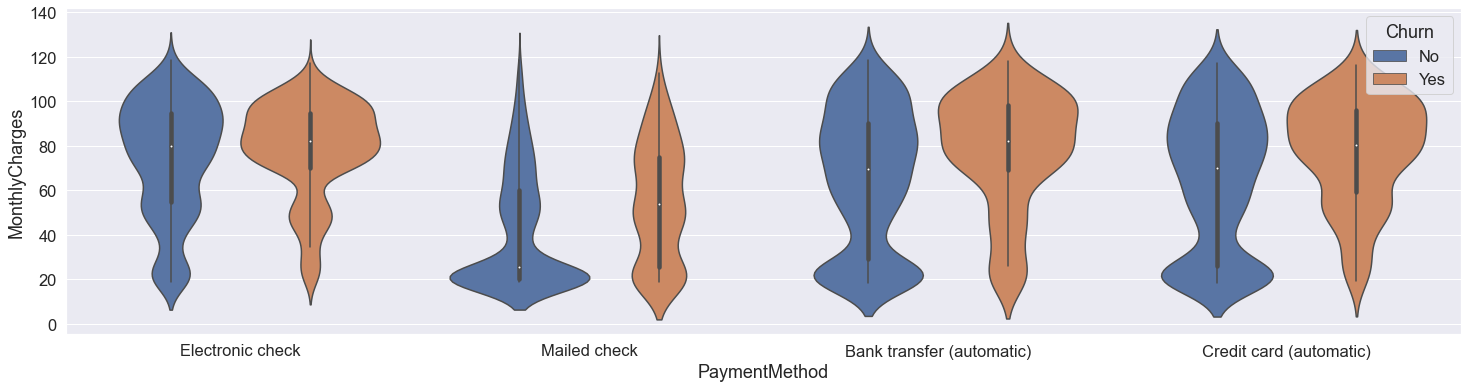

In [79]:
sns.violinplot(data=data, x='PaymentMethod', y='MonthlyCharges', hue='Churn')
plt.show()
# Ciutkę lepiej, ale też zbytnio nic nie daje

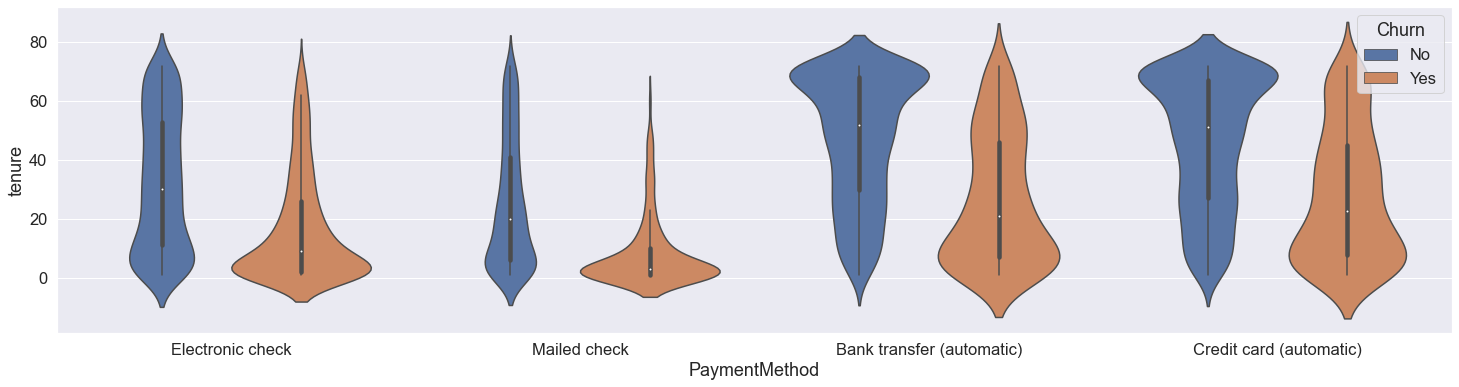

In [78]:
sns.violinplot(data=data, x='PaymentMethod', y='tenure', hue='Churn')
plt.show()
# Tutaj szczególnie dla churn=yes występuje fajna modalność

In [205]:
corr_matrix = data.iloc[:, 2:].corr("pearson")

In [206]:
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.244194,0.825293
MonthlyCharges,0.244194,1.000000,0.650540
TotalCharges,0.825293,0.650540,1.000000


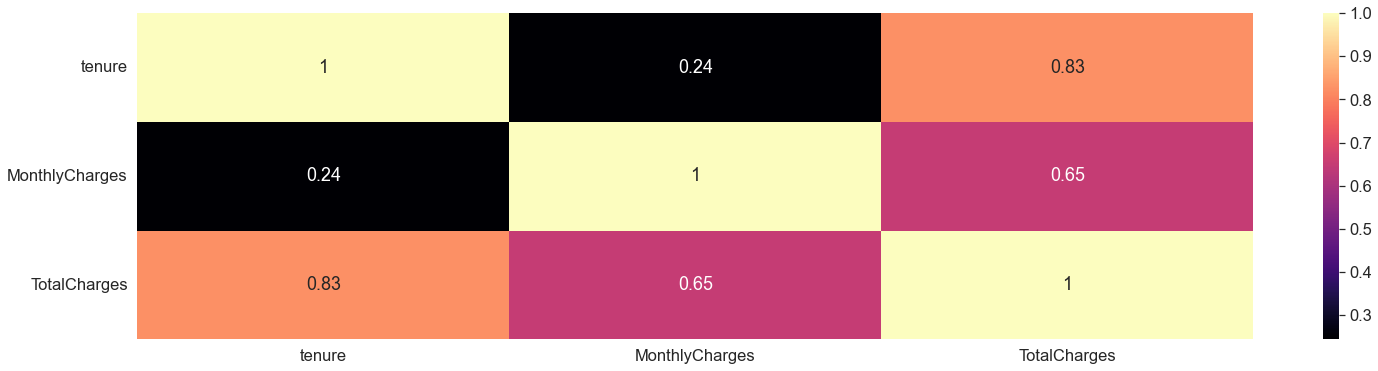

In [218]:
sns.heatmap(corr_matrix, annot=True, cmap="magma")
plt.show()

The correlation matrix showcases the following relationships:

Tenure & TotalCharges: Exhibits a strong positive correlation of approximately , indicating a notable connection between the number of months a customer has stayed and the total charges incurred. This suggests that as tenure increases, total charges tend to rise significantly.

Tenure & MonthlyCharges: Demonstrates a modest positive correlation, this implies a slight tendency for monthly charges to increase with tenure, but the relationship is not as pronounced as with TotalCharges.

MonthlyCharges & TotalCharges: Displays a moderate positive correlation, suggesting a notable connection between the total charges and monthly charges. While these variables are related, it's less strong compared to the association between Tenure and TotalCharges.

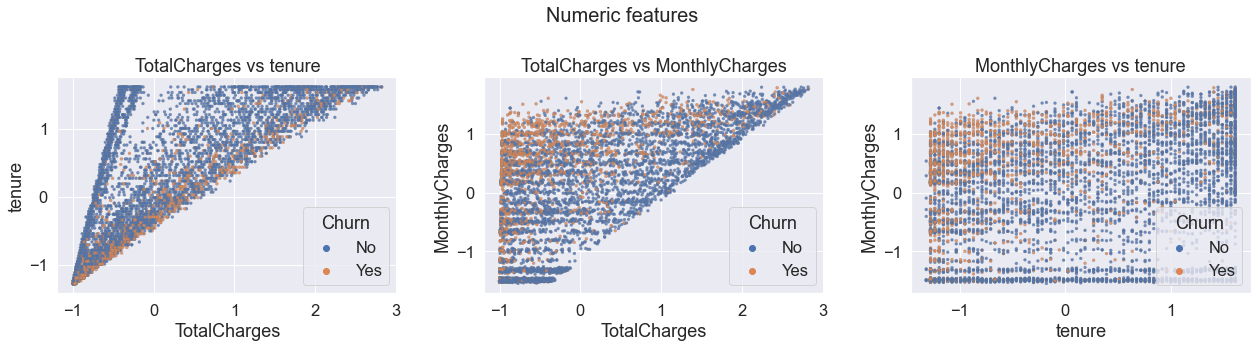

In [83]:
# TODO zmiana kolorów

fig = plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(
    x=data["TotalCharges"],
    y=data["tenure"],
    hue="Churn",
    data=data,
    edgecolor="grey",
    alpha=0.8,
    s=9,
)
plt.title("TotalCharges vs tenure")

plt.subplot(1, 3, 2)
ax2 = sns.scatterplot(
    x=data["TotalCharges"],
    y=data["MonthlyCharges"],
    hue="Churn",
    data=data,
    edgecolor="grey",
    alpha=0.8,
    s=9,
)
plt.title("TotalCharges vs MonthlyCharges")

plt.subplot(1, 3, 3)
ax2 = sns.scatterplot(
    x=data["tenure"],
    y=data["MonthlyCharges"],
    hue="Churn",
    data=data,
    edgecolor="grey",
    alpha=0.8,
    s=9,
)
plt.title("MonthlyCharges vs tenure")

fig.suptitle("Numeric features", fontsize=20)
plt.tight_layout()
plt.show()

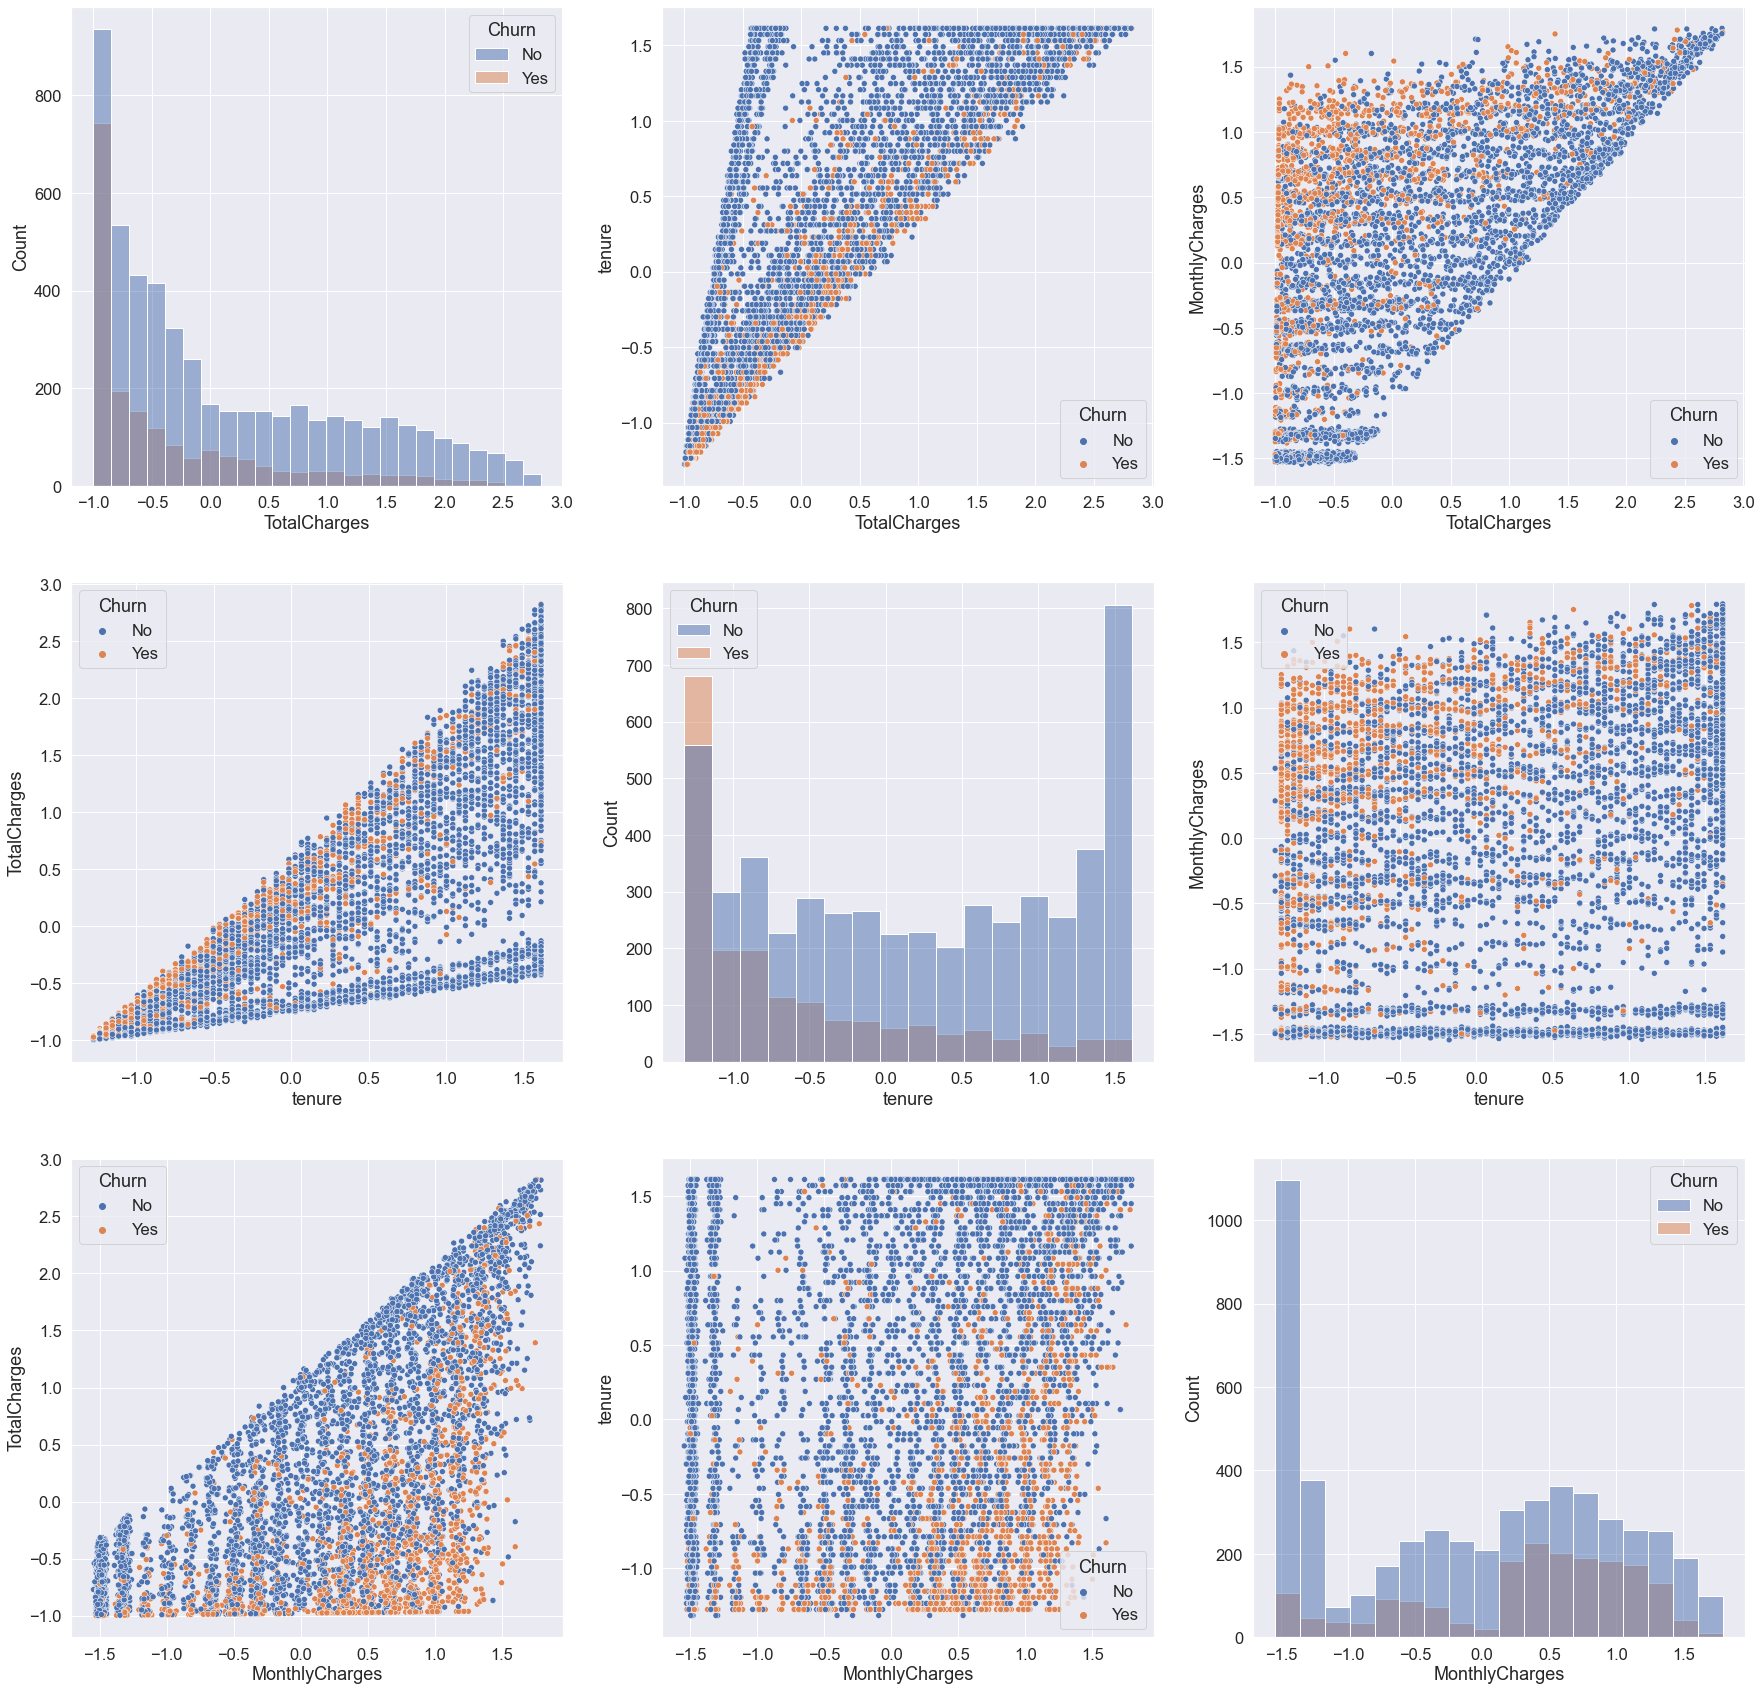

In [84]:
numeric_columns = ['TotalCharges', 'tenure', 'MonthlyCharges']
numeric_columns_n = len(numeric_columns)
plt.figure(figsize=(30,30))
for i, col in enumerate(numeric_columns):
    for j, row in enumerate(numeric_columns):
        plt.subplot(numeric_columns_n, numeric_columns_n, numeric_columns_n*i+j+1)
        if col == row:
            sns.histplot(data=data, x=col, hue='Churn')
        else:
            sns.scatterplot(data=data, x=col, y=row, hue='Churn')
plt.show()

Może jakieś wykresy mozaikowe?


In [68]:
from statsmodels.graphics.mosaicplot import mosaic

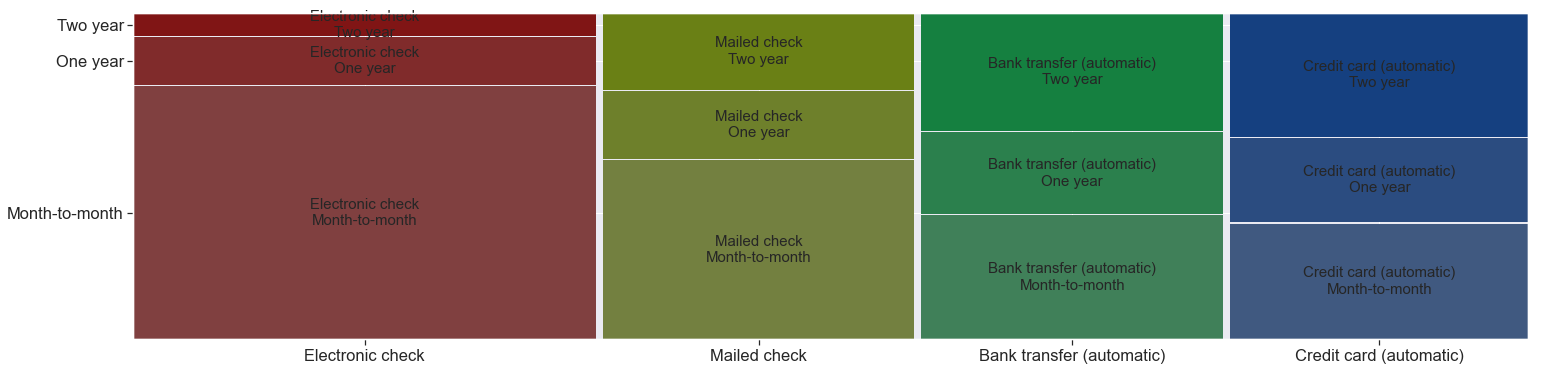

In [98]:
mosaic(data, ['PaymentMethod', 'Contract'])
plt.show()

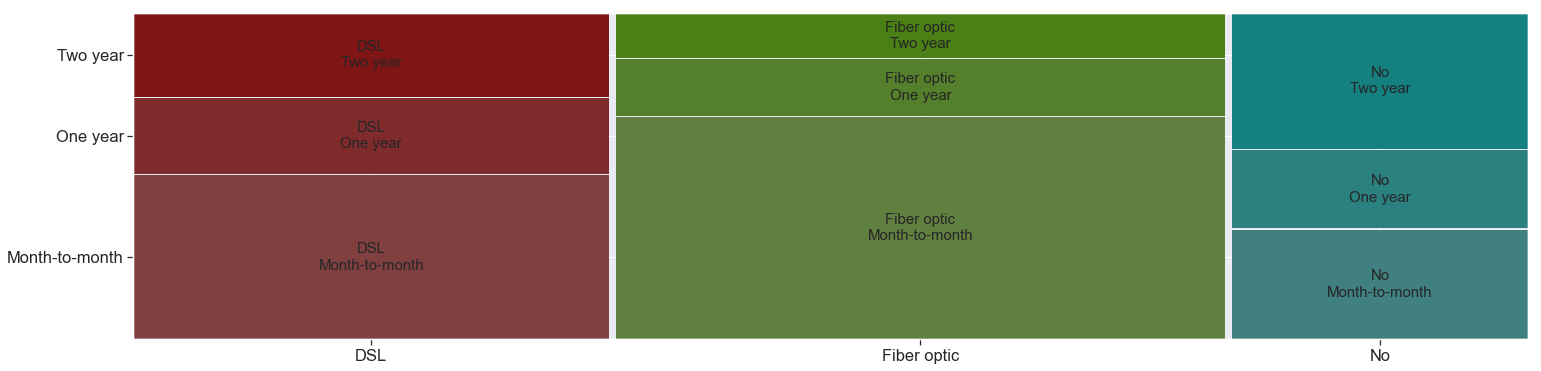

In [99]:
mosaic(data, ['InternetService', 'Contract'])
plt.show()

Może testy: tutaj spoko ktoś porobił?

https://www.kaggle.com/code/ahmedshahriarsakib/churn-prediction-i-eda-statistical-analysis#7-Multivariate-Analysis

# Preprocessing

In [34]:
data[['Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 
      'PaperlessBilling', 'Churn']] = data[['Partner', 'Dependents', 
                                            'PhoneService', 'MultipleLines', 
                                            'PaperlessBilling', 'Churn']].replace({'Yes': 1, 'No': 0}, inplace=False)

In [35]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1


# Classification

## Linear regression

In [1]:
from sklearn.linear_model import LogisticRegression

In [36]:
LogReg = LogisticRegression()


TypeError: fit() missing 1 required positional argument: 'y'

Cross validacja, bootstrap 

## LDA 

## QDA

## KNN

## Decision Tree

## Random forest

## Naive Bayes

## Logistic regression

## Support Vector Machines

## Neuralk Network